In [47]:
# Install required package(s)
pkgs <- c("faraway", "investr", "mgcv", "performance", "pscl")
lib <- installed.packages()[, "Package"]
install.packages(setdiff(pkgs, lib))

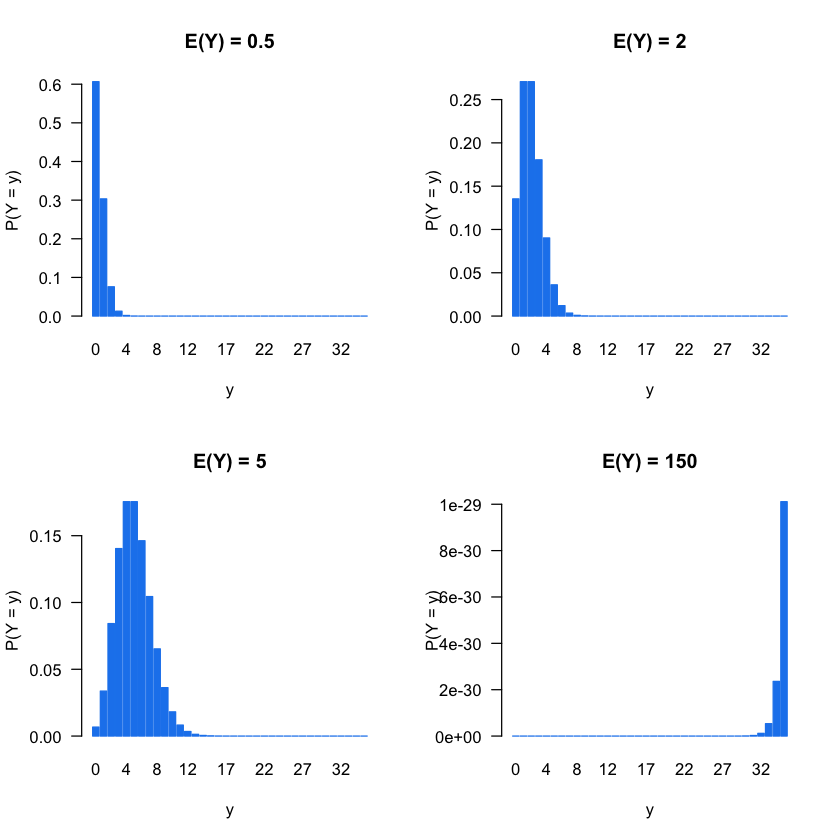

In [49]:
# Y ~ Poisson(lambda = 0.5)
set.seed(2004)  # for reproducibility
par(mfrow = c(2, 2))
for (lambda in c(0.5, 2, 5, 15)) {
  y <- dpois(0:35, lambda = lambda)
  barplot(y, xlab = "y", ylab = "P(Y = y)", names = 0:35, main = paste("E(Y) =", lambda), 
          col = "dodgerblue2", border = "dodgerblue2", las = 1)
}

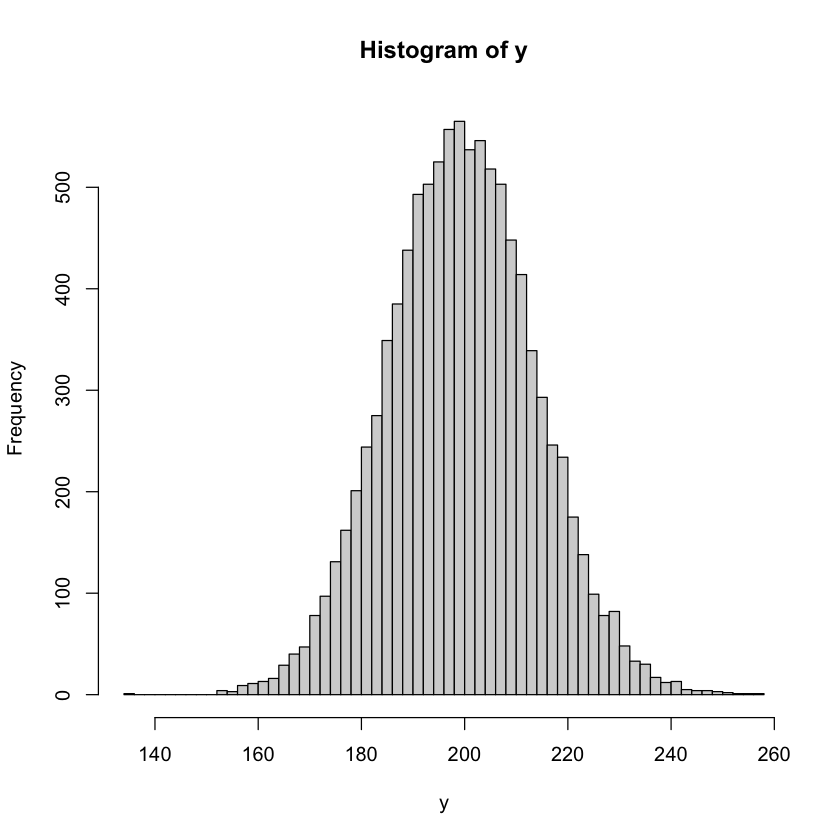

In [52]:
y <- rpois(10000, lambda = 200)
hist(y, 50)

In [ ]:
# Read about the Galapagos Islands species diversity data set
?faraway::gala

In [53]:
# Load the Galapagos Islands data
data(gala, package = "faraway")

# Print structure of data frame
str(gala)

'data.frame':	30 obs. of  7 variables:
 $ Species  : num  58 31 3 25 2 18 24 10 8 2 ...
 $ Endemics : num  23 21 3 9 1 11 0 7 4 2 ...
 $ Area     : num  25.09 1.24 0.21 0.1 0.05 ...
 $ Elevation: num  346 109 114 46 77 119 93 168 71 112 ...
 $ Nearest  : num  0.6 0.6 2.8 1.9 1.9 8 6 34.1 0.4 2.6 ...
 $ Scruz    : num  0.6 26.3 58.7 47.4 1.9 ...
 $ Adjacent : num  1.84 572.33 0.78 0.18 903.82 ...


In [54]:
gala$Endemics <- NULL  # remove the second variable

In [55]:
# Print a summary of the data
summary(gala)

    Species            Area            Elevation          Nearest     
 Min.   :  2.00   Min.   :   0.010   Min.   :  25.00   Min.   : 0.20  
 1st Qu.: 13.00   1st Qu.:   0.258   1st Qu.:  97.75   1st Qu.: 0.80  
 Median : 42.00   Median :   2.590   Median : 192.00   Median : 3.05  
 Mean   : 85.23   Mean   : 261.709   Mean   : 368.03   Mean   :10.06  
 3rd Qu.: 96.00   3rd Qu.:  59.237   3rd Qu.: 435.25   3rd Qu.:10.03  
 Max.   :444.00   Max.   :4669.320   Max.   :1707.00   Max.   :47.40  
     Scruz           Adjacent      
 Min.   :  0.00   Min.   :   0.03  
 1st Qu.: 11.03   1st Qu.:   0.52  
 Median : 46.65   Median :   2.59  
 Mean   : 56.98   Mean   : 261.10  
 3rd Qu.: 81.08   3rd Qu.:  59.24  
 Max.   :290.20   Max.   :4669.32  

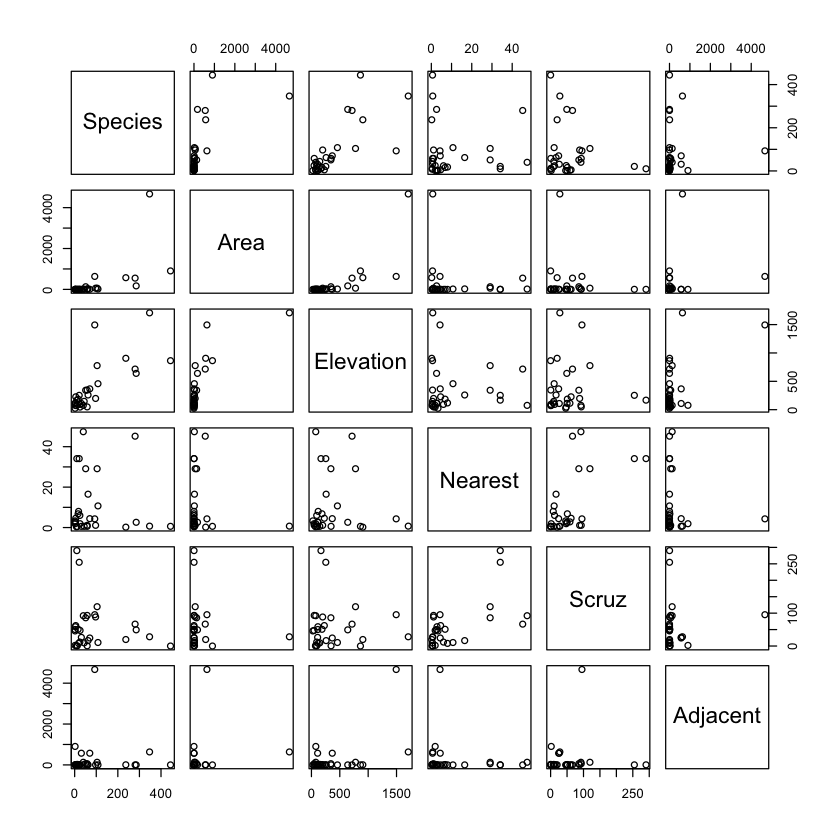

In [56]:
# This is a relatively small data set, so a scatterplot matrix could be useful
pairs(gala)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 x value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y va

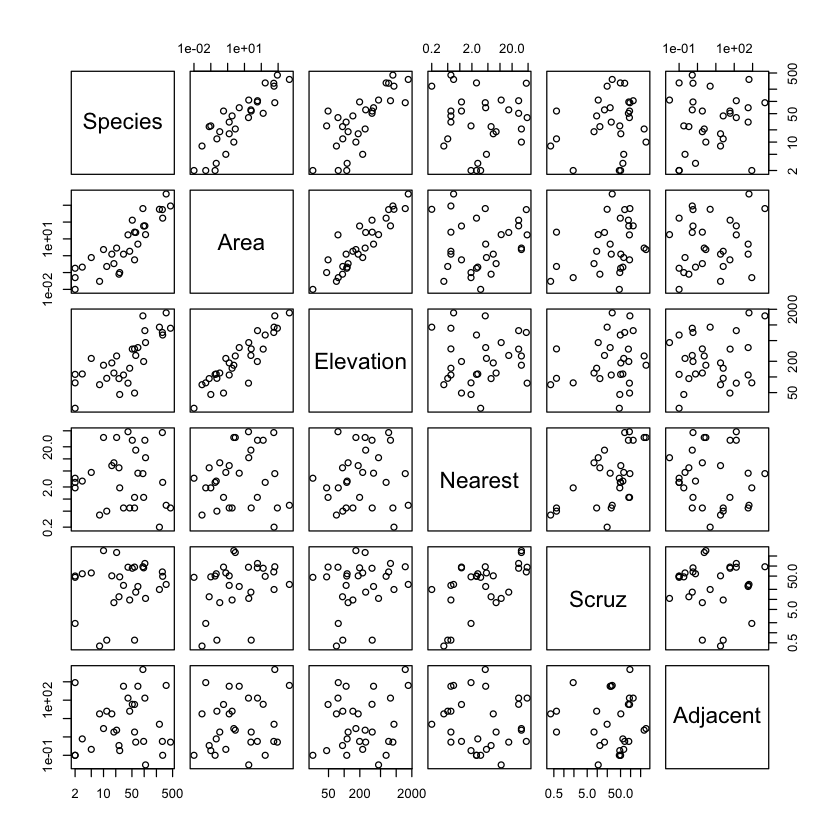

In [57]:
pairs(gala, log = "xy")

In [ ]:
# Try taking logs...
pairs(~ log(Species) + log(Area) + log(Elevation) + log(Nearest) + 
      log(Scruz + 0.1) + log(Adjacent), data = gala)

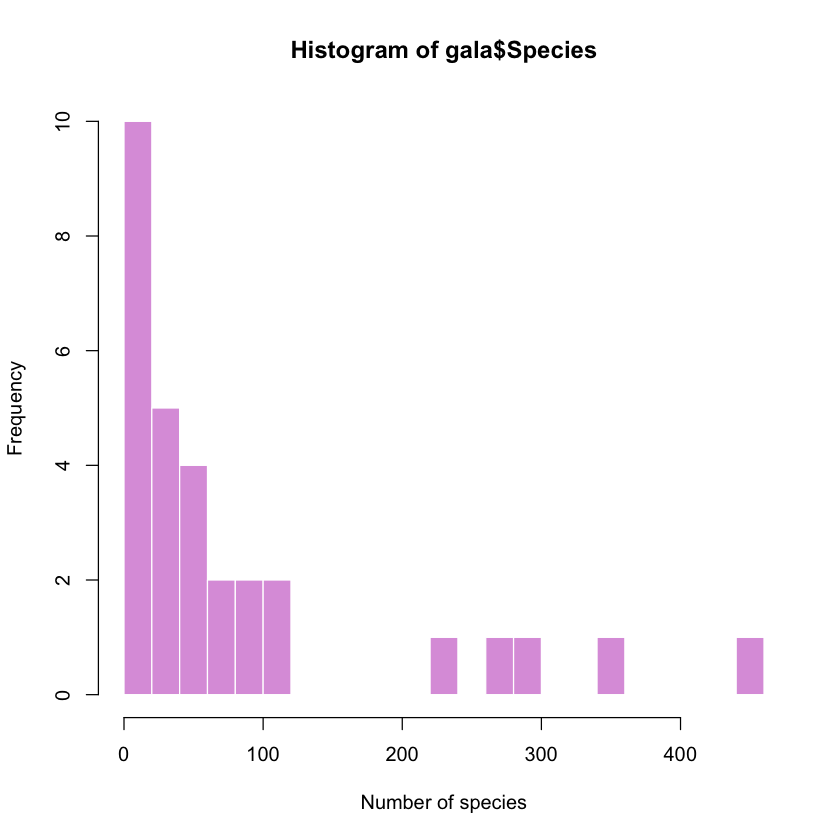

In [58]:
# Look at distribution of response
hist(gala$Species, breaks = nrow(gala), xlab = "Number of species", 
     col = "plum", border = "white")
#
#
# Is this enough to suggest a distirbution for modeling? 
#
# https://github.com/bgreenwell/uc-bana7052-old/issues/6


Call:
lm(formula = log(Species) ~ log(Area) + log(Elevation) + log(Nearest) + 
    I(log(Scruz + 0.1)) + log(Adjacent), data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4563 -0.5192 -0.1059  0.4632  1.3351 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          5.10569    1.64880   3.097  0.00493 ** 
log(Area)            0.50350    0.09942   5.064 3.53e-05 ***
log(Elevation)      -0.37384    0.32242  -1.159  0.25767    
log(Nearest)        -0.06564    0.11475  -0.572  0.57262    
I(log(Scruz + 0.1)) -0.08255    0.09517  -0.867  0.39433    
log(Adjacent)       -0.02488    0.04596  -0.541  0.59327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7877 on 24 degrees of freedom
Multiple R-squared:  0.7899,	Adjusted R-squared:  0.7461 
F-statistic: 18.05 on 5 and 24 DF,  p-value: 1.941e-07


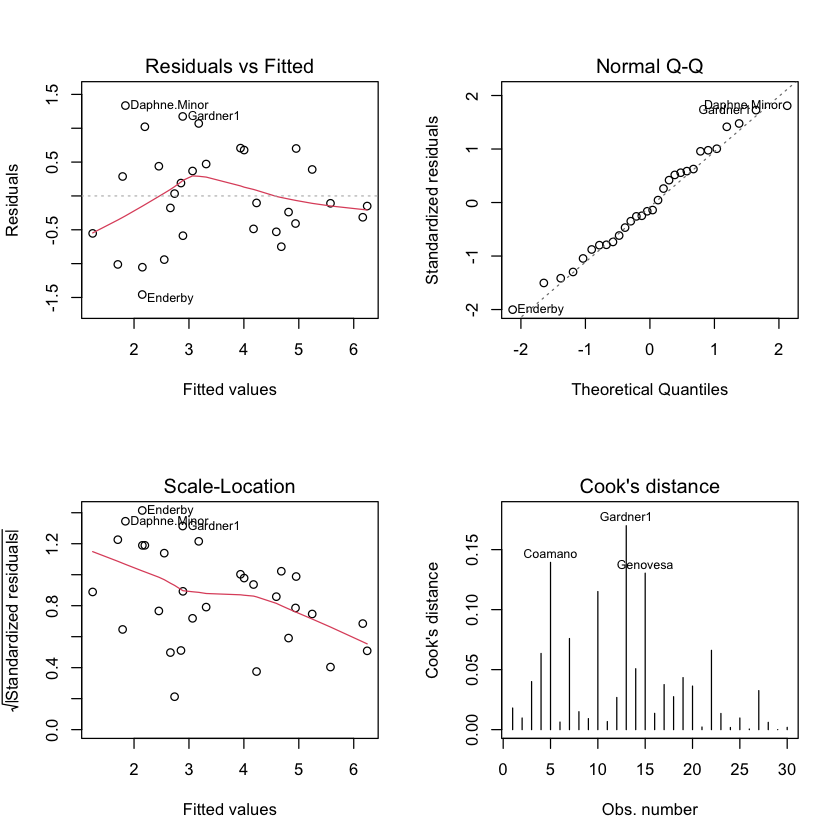

In [61]:
# Try OLS
gala.norm <- lm(log(Species) ~ log(Area) + log(Elevation) + log(Nearest) + 
                I(log(Scruz + 0.1)) + log(Adjacent), data = gala)
summary(gala.norm)

# Some basic residual plots
par(mfrow = c(2, 2))
plot(gala.norm, which = 1:4)

In [62]:
car::vif(gala.norm)

log(Area)      log(Elevation)        log(Nearest) I(log(Scruz + 0.1)) 
           5.661511            5.615663            1.554760            1.572384 
      log(Adjacent) 
           1.055232

In [63]:
# A simple Poisson GLM assumes that Y ~ Poisson(mu), where E(Y) = mu and
#
#   log(mu) = b0 + b1*x1 + b2*x2 + ... (i.e., the linear predictor).
#
# Note that 0 < mu < infinity, so the log transform/link makes sense.

# Fit a simple (additive) Poisson GLM to the data
gala.pois <- glm(Species ~ log(Area) + log(Elevation) + log(Nearest) + 
                 I(log(Scruz + 0.1)) + log(Adjacent), family = poisson(link = "log"), 
                 data = gala)
summary(gala.pois)


Call:
glm(formula = Species ~ log(Area) + log(Elevation) + log(Nearest) + 
    I(log(Scruz + 0.1)) + log(Adjacent), family = poisson(link = "log"), 
    data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4479  -2.6717  -0.4547   2.5613   8.2970  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          3.287941   0.284661  11.550  < 2e-16 ***
log(Area)            0.348445   0.018029  19.327  < 2e-16 ***
log(Elevation)       0.036421   0.056983   0.639  0.52272    
log(Nearest)        -0.040644   0.013781  -2.949  0.00318 ** 
I(log(Scruz + 0.1)) -0.030045   0.010492  -2.864  0.00419 ** 
log(Adjacent)       -0.089014   0.006948 -12.812  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  359.12  on 24  degrees of freedom
AIC: 531.96

Number of Fisher Scoring

In [64]:
# Check for dispersion
performance::check_overdispersion(gala.pois)

Overdispersion detected.



# Overdispersion test

       dispersion ratio =  16.559
  Pearson's Chi-Squared = 397.420
                p-value = < 0.001


In [65]:
# Same as above, but doing it by hand
# Goodness of fit test (akin to the F test for linear regression)
(gof <- sum(residuals(gala.pois, type = "pearson") ^ 2))  # test statistic
pchisq(gof, df = df.residual(gala.pois), lower = FALSE)  # p-value

[1] 397.4205

[1] 2.541608e-69

In [66]:
# Check VIFs
car::vif(gala.pois)

log(Area)      log(Elevation)        log(Nearest) I(log(Scruz + 0.1)) 
           5.804485            5.981274            1.522015            1.664911 
      log(Adjacent) 
           1.388253

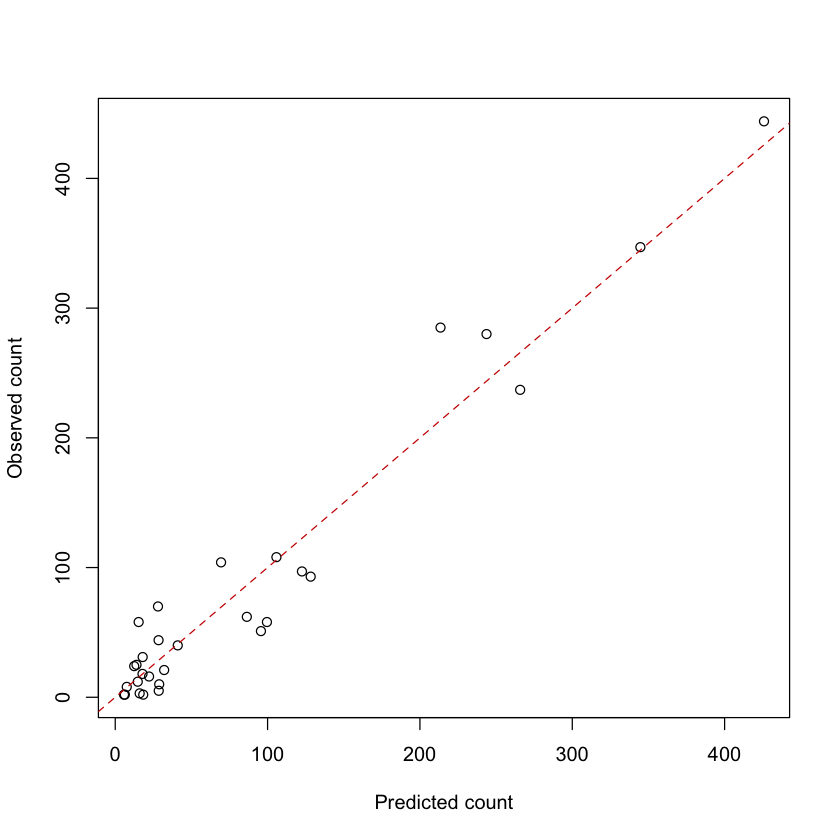

In [67]:
# Does the model fit the data well?
pred <- predict(gala.pois, type = "response")
plot(pred, gala$Species, xlab = "Predicted count", ylab = "Observed count")
abline(0, 1, lty = 2, col = "red3")

In [68]:
# Update model summary (i.e., standard errors with new dispersion parameter)
dp <- gof / df.residual(gala.pois)
print(dp)
summary(gala.pois, dispersion = dp)

[1] 16.55919



Call:
glm(formula = Species ~ log(Area) + log(Elevation) + log(Nearest) + 
    I(log(Scruz + 0.1)) + log(Adjacent), family = poisson(link = "log"), 
    data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4479  -2.6717  -0.4547   2.5613   8.2970  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          3.28794    1.15837   2.838  0.00453 ** 
log(Area)            0.34844    0.07337   4.749 2.04e-06 ***
log(Elevation)       0.03642    0.23188   0.157  0.87519    
log(Nearest)        -0.04064    0.05608  -0.725  0.46859    
I(log(Scruz + 0.1)) -0.03005    0.04270  -0.704  0.48162    
log(Adjacent)       -0.08901    0.02827  -3.149  0.00164 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 16.55919)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  359.12  on 24  degrees of freedom
AIC: 531.96

Number of Fisher Scoring

In [69]:
# Try using quasi-Poisson nmodel instead (equivalent to above, but more automatic)
gala.pois <- glm(Species ~ log(Area) + log(Elevation) + log(Nearest) + 
                 I(log(Scruz + 0.1)) + log(Adjacent), family = quasipoisson(link = "log"), 
                 data = gala)
summary(gala.pois)


Call:
glm(formula = Species ~ log(Area) + log(Elevation) + log(Nearest) + 
    I(log(Scruz + 0.1)) + log(Adjacent), family = quasipoisson(link = "log"), 
    data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.4479  -2.6717  -0.4547   2.5613   8.2970  

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.28794    1.15837   2.838  0.00908 ** 
log(Area)            0.34844    0.07337   4.749 7.85e-05 ***
log(Elevation)       0.03642    0.23188   0.157  0.87650    
log(Nearest)        -0.04064    0.05608  -0.725  0.47559    
I(log(Scruz + 0.1)) -0.03005    0.04270  -0.704  0.48839    
log(Adjacent)       -0.08901    0.02827  -3.149  0.00435 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 16.55919)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  359.12  on 24  degrees of freedom
AIC: NA

Number of Fisher S

In [ ]:
###############################################################################
#
# A simple Poisson regression epidemic model
#
###############################################################################

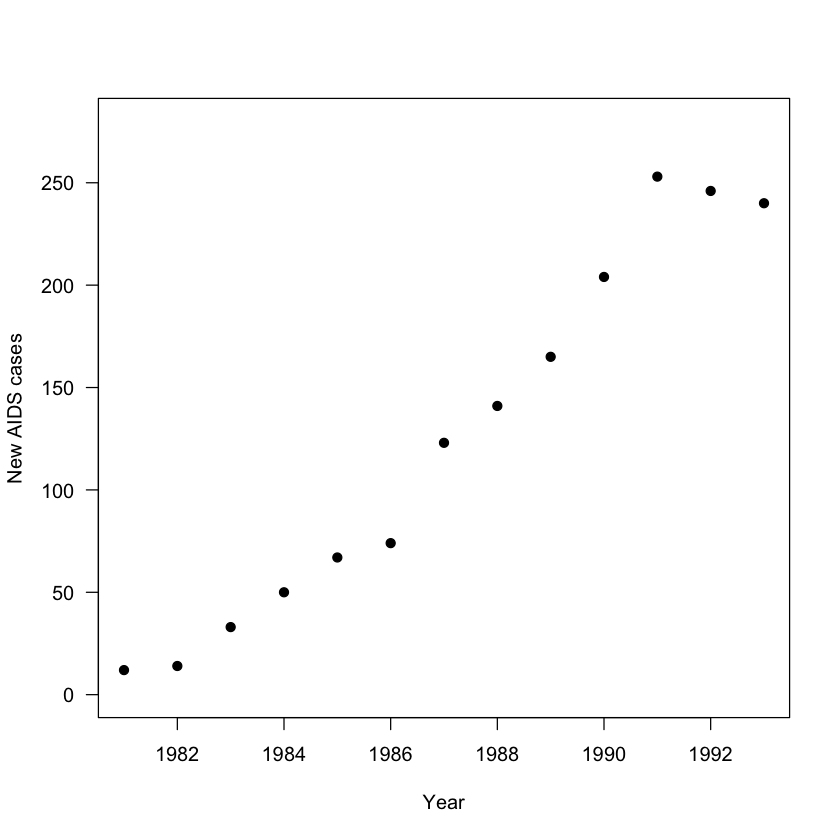

In [70]:
# Enter the data by hand and plot
cases <- c(12, 14, 33, 50, 67, 74, 123, 141, 165, 204, 253, 246, 240)
year <- 1:13 + 1980
plot(year, cases, xlab = "Year", ylab = "New AIDS cases", ylim = c(0, 280),
     pch = 19, col = 1, las = 1)

In [ ]:
# Does it look like the number of new cases each year is growing unchecked?


Call:
glm(formula = cases ~ year, family = poisson(link = "log"), data = aids)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6784  -1.5013  -0.2636   2.1760   2.7306  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.971e+02  1.546e+01  -25.68   <2e-16 ***
year         2.021e-01  7.771e-03   26.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 872.206  on 12  degrees of freedom
Residual deviance:  80.686  on 11  degrees of freedom
AIC: 166.37

Number of Fisher Scoring iterations: 4


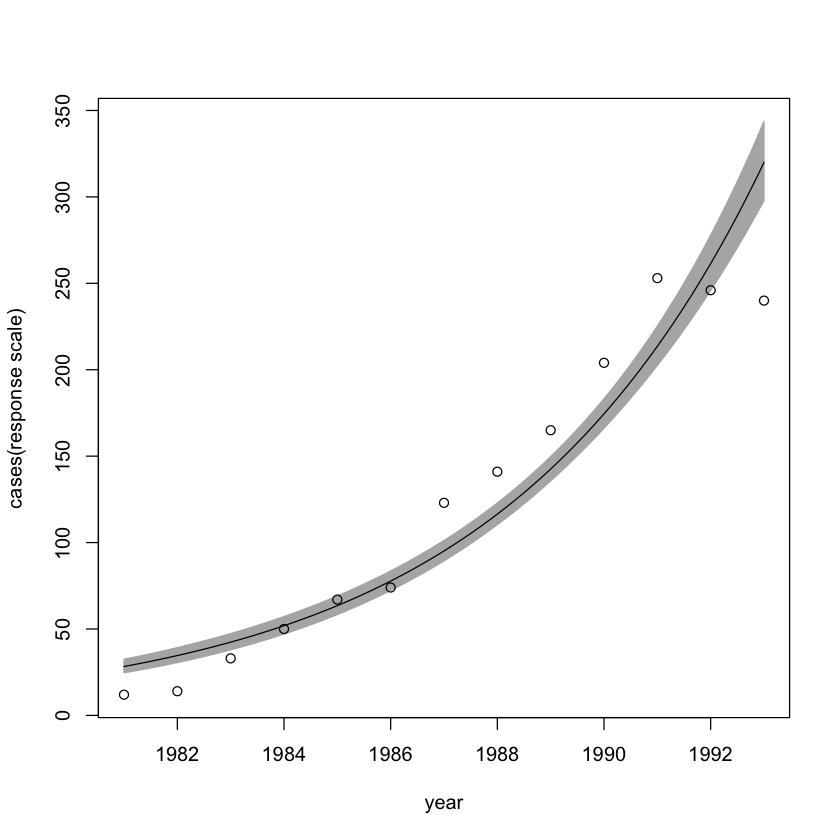

In [71]:
aids <- data.frame("cases" = cases, "year" = year)
summary(aids.pois1 <- glm(cases ~ year, data = aids, family = poisson(link = "log")))
investr::plotFit(aids.pois1, interval = "confidence", shade = TRUE)

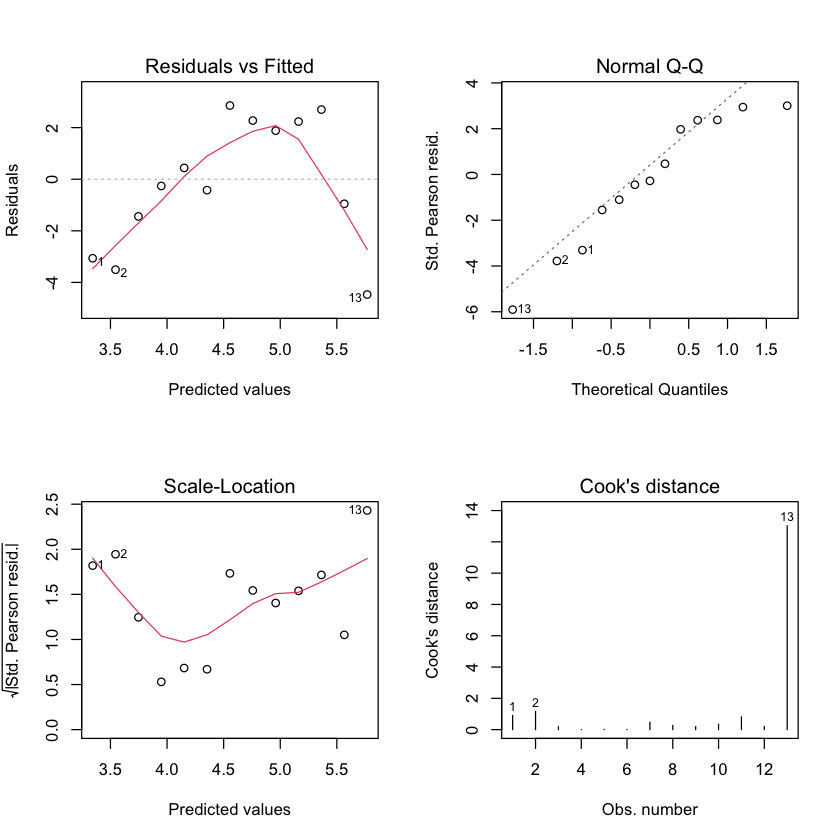

In [72]:
# Check residual plots (these will use the "deviance" residuals for a Poisson model)
par(mfrow = c(2, 2))
plot(aids.pois1, which = 1:4)

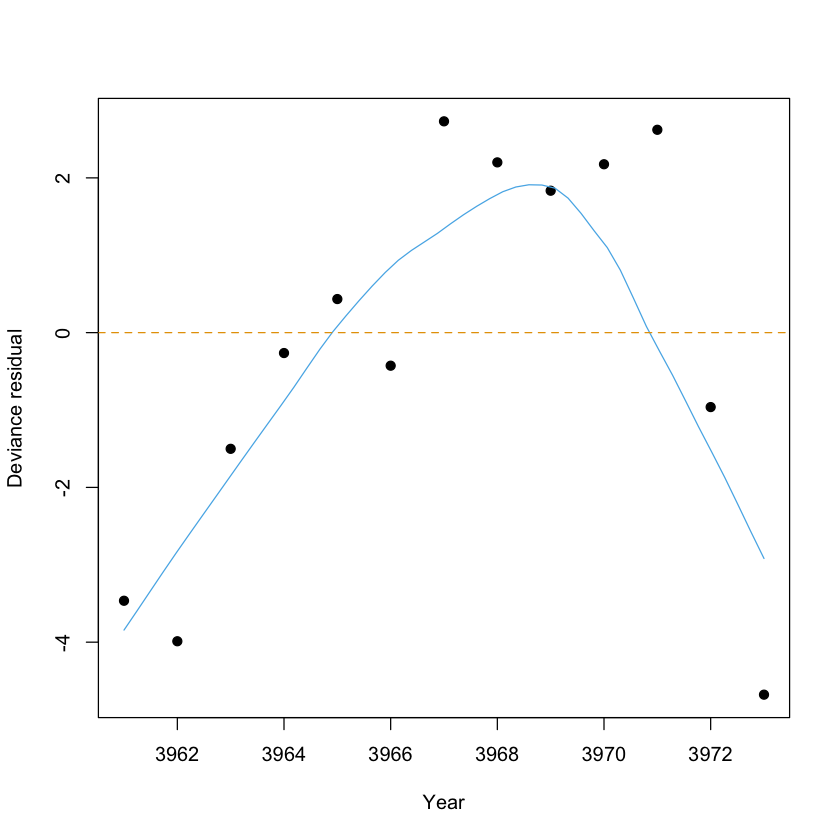

In [73]:
# Plot residual vs. year
palette("Okabe-Ito")
scatter.smooth(aids$year + 1980, residuals(aids.pois1, type = "deviance"), pch = 19,
    xlab = "Year", ylab = "Deviance residual", lpars = list(col = 3))
abline(h = 0, lty = 2, col = 2)
palette("default")


Call:
glm(formula = cases ~ poly(year, degree = 2), family = poisson(link = "log"), 
    data = aids)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.45903  -0.64491   0.08927   0.67117   1.54596  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)              4.44867    0.03803 116.964  < 2e-16 ***
poly(year, degree = 2)1  3.46922    0.15742  22.038  < 2e-16 ***
poly(year, degree = 2)2 -0.95511    0.11896  -8.029 9.82e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 872.2058  on 12  degrees of freedom
Residual deviance:   9.2402  on 10  degrees of freedom
AIC: 96.924

Number of Fisher Scoring iterations: 4


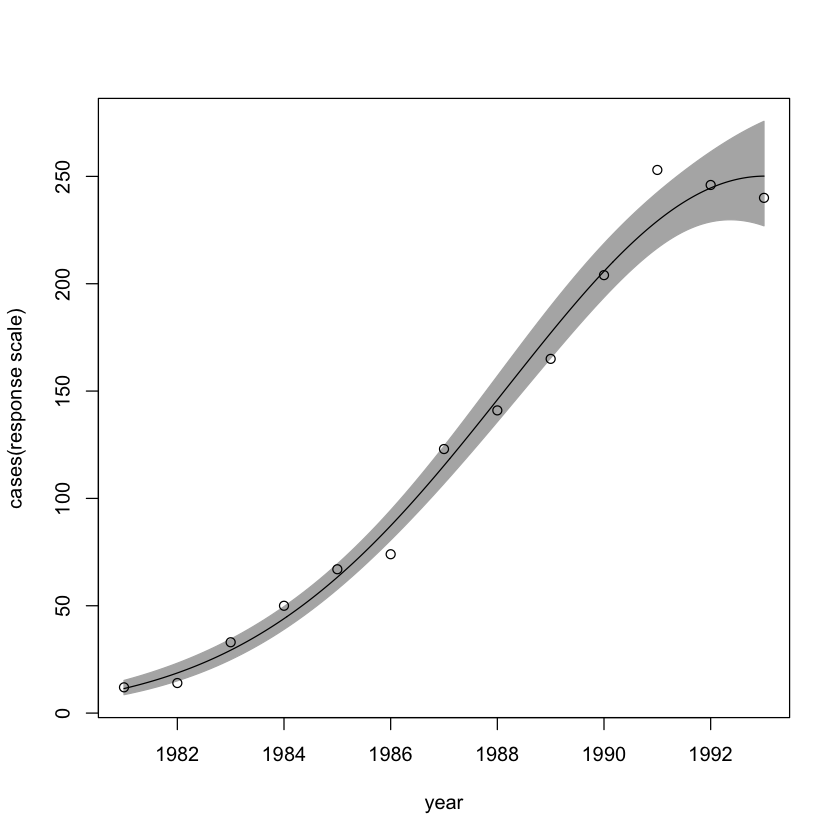

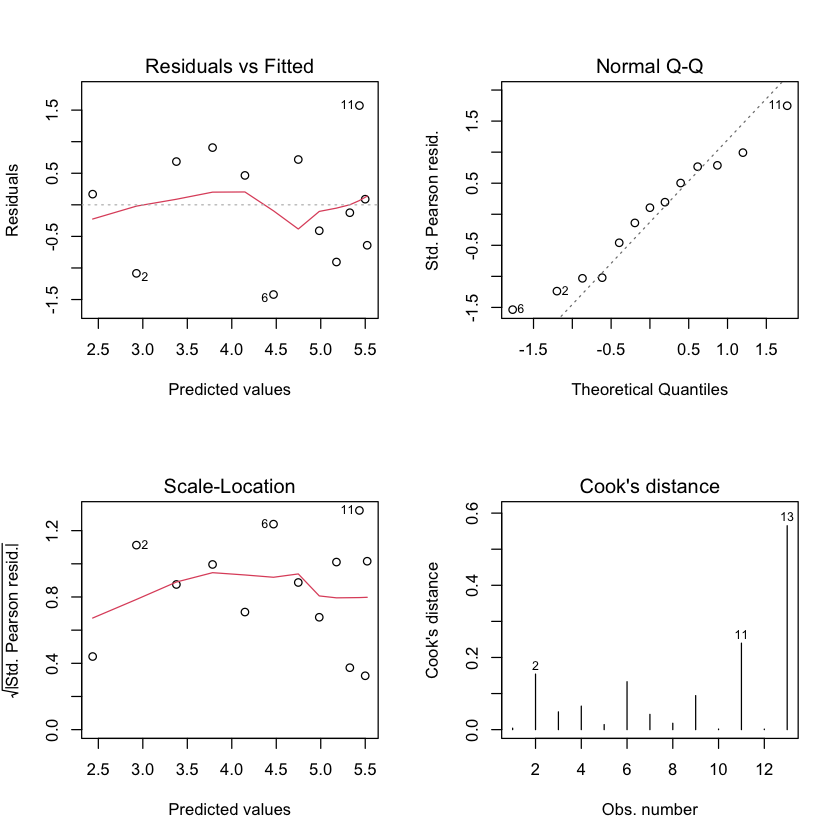

In [74]:
# Perhaps a quadratic trend would be better
aids.pois2 <- glm(cases ~ poly(year, degree = 2), data = aids, family = poisson(link = "log"))
summary(aids.pois2)
investr::plotFit(aids.pois2, interval = "confidence", shade = TRUE)
par(mfrow = c(2, 2))
plot(aids.pois2, which = 1:4)

In [ ]:
# Although the output from summary gives us the relevant p-value, we could test
# this more generally using our reduced-vs-full model framework
anova(aids.pois1, aids.pois2, test = "Chisq")

In [ ]:
#
# NOTE: The sample size here is incredibly small, so be suspicious of any inference...
#

In [ ]:
res <- resid(aids.pois2, type = "pearson")
plot(res, type = "l")


Family: poisson 
Link function: log 

Formula:
cases ~ s(year)

Parametric coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   4.4578     0.0381     117   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
          edf Ref.df Chi.sq p-value    
s(year) 3.973  4.907  574.3  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.989   Deviance explained = 99.2%
UBRE = 0.30615  Scale est. = 1         n = 13

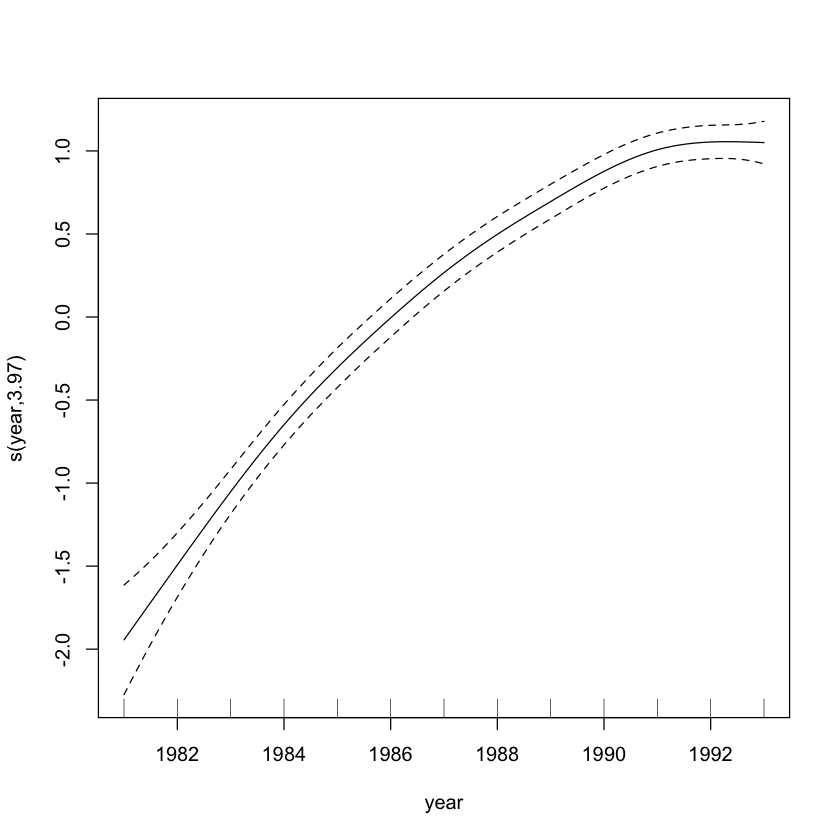

In [75]:
# Try fitting a generalized additive model (GAM); in a GAM, you can specify
# nonparametric smooth functions of any of the predictors and not worry
# as much about finding a suitable transformation manually
library(mgcv)

# Fit a simple Poisson GAM using a smooth function of year
aids.pois3 <- gam(cases ~ s(year), data = aids, family = poisson(link = "log"))
summary(aids.pois3)
plot(aids.pois3, rug = TRUE)

In [ ]:
###############################################################################
#
# Dealing with zero-inflated outcomes
#
###############################################################################

In [76]:
# The state wildlife biologists want to model how many fish are being caught by 
# fishermen at a state park. Visitors are asked how long they stayed, how many 
# people were in the group, were there children in the group, and how many fish 
# were caught. Some visitors do not fish, but there is no data on whether a 
# person fished or not. Some visitors who did fish did not catch any fish so 
# there are excess zeros in the data because of the people that did not fish.
#
# Our sample consists of We have data on N=250 groups that went to a park. Each 
# group was questioned about how many fish they caught (count), how many 
# children were in the group (child), how many people were in the group 
# (persons), and whether or not they brought a camper to the park (camper).
#
# The data can be read in as follows:
fish <- read.csv("https://stats.idre.ucla.edu/stat/data/fish.csv")

In [77]:
# Retain only variables of interest and print summary
fish <- fish[, c("count", "child", "persons", "camper")]
summary(fish)

     count             child          persons          camper     
 Min.   :  0.000   Min.   :0.000   Min.   :1.000   Min.   :0.000  
 1st Qu.:  0.000   1st Qu.:0.000   1st Qu.:2.000   1st Qu.:0.000  
 Median :  0.000   Median :0.000   Median :2.000   Median :1.000  
 Mean   :  3.296   Mean   :0.684   Mean   :2.528   Mean   :0.588  
 3rd Qu.:  2.000   3rd Qu.:1.000   3rd Qu.:4.000   3rd Qu.:1.000  
 Max.   :149.000   Max.   :3.000   Max.   :4.000   Max.   :1.000  

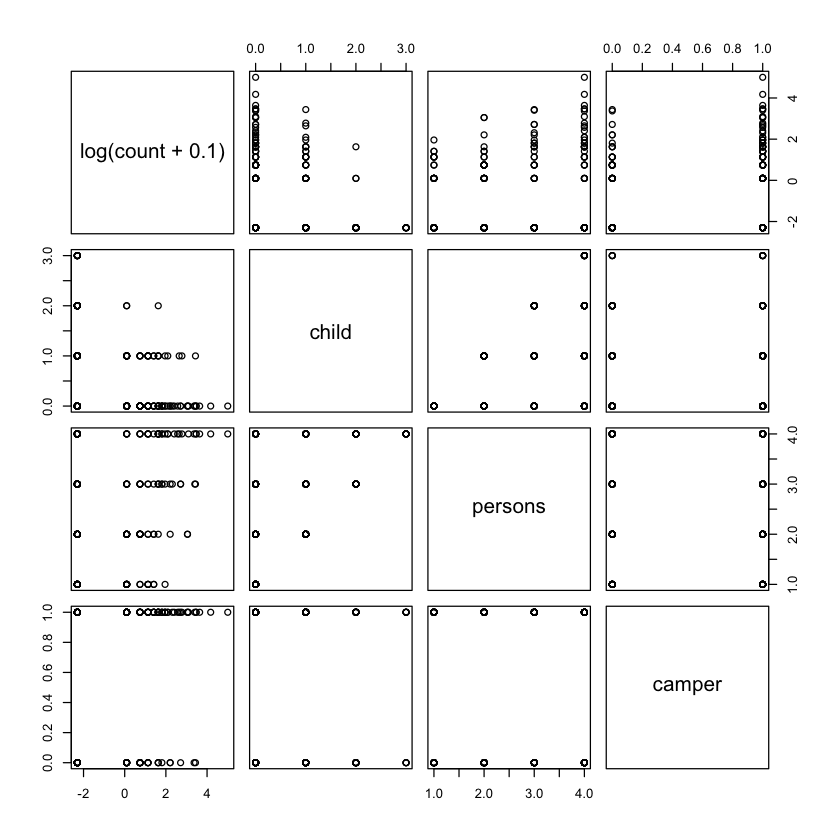

In [78]:
# Scatterplot matrix
pairs(log(count + 0.1) ~ ., data = fish)


Call:
glm(formula = count ~ ., family = poisson(link = "log"), data = fish)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-6.8096  -1.4431  -0.9060  -0.0406  16.1417  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.98183    0.15226  -13.02   <2e-16 ***
child       -1.68996    0.08099  -20.87   <2e-16 ***
persons      1.09126    0.03926   27.80   <2e-16 ***
camper       0.93094    0.08909   10.45   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2958.4  on 249  degrees of freedom
Residual deviance: 1337.1  on 246  degrees of freedom
AIC: 1682.1

Number of Fisher Scoring iterations: 6


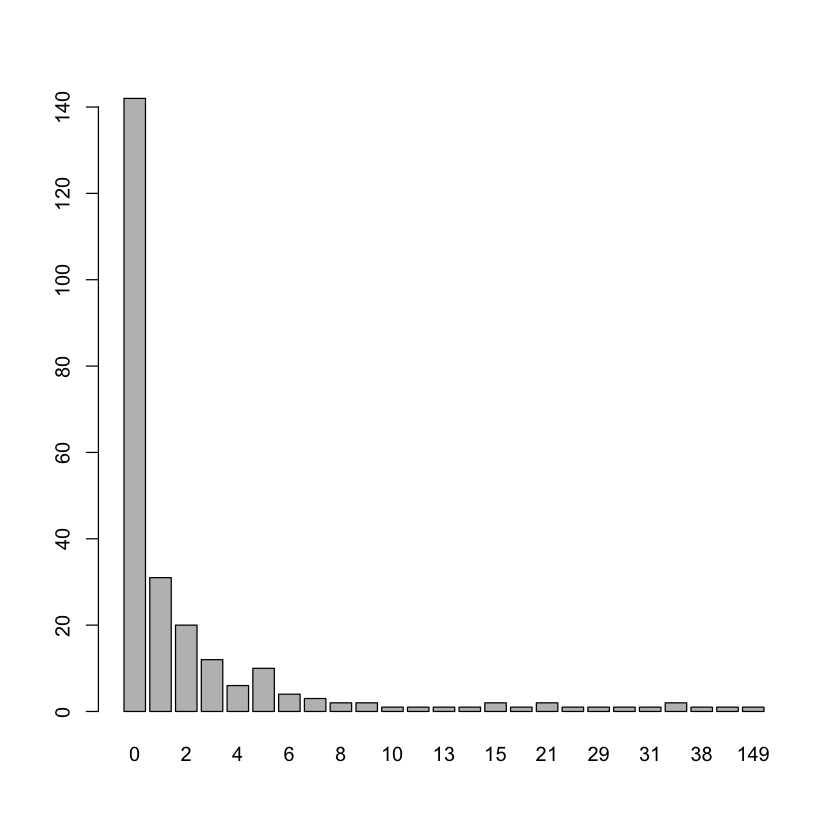

In [82]:
# Simple Poisson model
fish.pois <- glm(count ~ ., data = fish, family = poisson(link = "log"))
summary(fish.pois)
barplot(table(fish$count))

In [83]:
# Check for zero-inflation
performance::check_zeroinflation(fish.pois)

Model is underfitting zeros (probable zero-inflation).



# Check for zero-inflation

   Observed zeros: 142
  Predicted zeros: 95
            Ratio: 0.67


In [84]:
# In addition to predicting the number of fish caught, there is interest in 
# predicting the existence of excess zeros (i.e., the zeroes that were not 
# simply a result of bad luck or lack of fishing skill). In particular, we'd
# like to estimate the effect of party size on catching zero fish.
#
# We can accomplish this in several ways, but popular choices include 
#
#   1) the zero-inflated Poisson (or negative binomial) model
#   2) the hurdle model
#
# In this example, we'll use a simple hurdle model, which essentially fits 
# two seperate models:
#
#   * P(Y = 0) via a logistic regression
#   * P(Y = j), j > 0 via a truncated Poisson regression
#
# Below is a basic example that will help us answer the question(s) of interest
library(pscl)
summary(fish.hurdle <- hurdle(count ~ child + camper | persons, data = fish))


Call:
hurdle(formula = count ~ child + camper | persons, data = fish)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-0.8590 -0.7384 -0.6782 -0.1234 23.9679 

Count model coefficients (truncated poisson with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.64668    0.08278  19.892   <2e-16 ***
child       -0.75918    0.09004  -8.432   <2e-16 ***
camper       0.75166    0.09112   8.249   <2e-16 ***
Zero hurdle model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.7808     0.3240  -2.410   0.0160 *
persons       0.1993     0.1161   1.716   0.0862 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 14 
Log-likelihood: -1047 on 5 Df

In [ ]:
# Check the logit part manually
z <- fish
z$count <- ifelse(z$count == 0, 0, 1)
glm(count ~ persons, data = z, family = binomial)

In [ ]:
# Interpretation:
#
# * For every additional child the expected log number of the fish caught 
#   reduces by 0.759.
# 
# * Being a camper increases the expected log number of fish caufght by 0.752.
#
# * For every additional person the log odds of catching zero fish increases by 
#   0.199

In [ ]:
# Predict a new observation
nd <- data.frame("child" = 0, "persons" = 3, "camper" = 1)
predict(fish.hurdle, newdata = nd, type = "prob")

In [85]:
# Try using a ZIP model instead
summary(fish.zip <- zeroinfl(count ~ child + camper | persons, data = fish))


Call:
zeroinfl(formula = count ~ child + camper | persons, data = fish)

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.2369 -0.7540 -0.6080 -0.1921 24.0847 

Count model coefficients (poisson with log link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.59789    0.08554  18.680   <2e-16 ***
child       -1.04284    0.09999 -10.430   <2e-16 ***
camper       0.83402    0.09363   8.908   <2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.2974     0.3739   3.470 0.000520 ***
persons      -0.5643     0.1630  -3.463 0.000534 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 12 
Log-likelihood: -1032 on 5 Df